## Linear Regression example
- boston

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

### Load dataset from sklearn

In [2]:
from sklearn.datasets import load_boston

boston = load_boston()
x_org, y_label = boston.data, boston.target
feature_names = boston.feature_names

print('Original data：{}, Label：{}'.format(x_org.shape, y_label.shape))
print('Features name：{}'.format(feature_names))

Original data：(506, 13), Label：(506,)
Features name：['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


### Only choose "RM" as input feature

In [3]:
x_data = x_org[:, feature_names == 'RM']
print('shape of x_data：{}'.format(x_data.shape))

shape of x_data：(506, 1)


#### A simple linear regression model can use two parameter：w0, w1 to represent. 
predict y = w0+w1x=w0*1+w1*x, which can be seen as the inner product of two vector, (w0, w1) and (1, x)

In [4]:
x = np.insert(x_data, 0, 1.0, axis=1)
print('Shape after adding pseudo variable:', x.shape)
print(x[:10, :])

Shape after adding pseudo variable: (506, 2)
[[1.    6.575]
 [1.    6.421]
 [1.    7.185]
 [1.    6.998]
 [1.    7.147]
 [1.    6.43 ]
 [1.    6.012]
 [1.    6.172]
 [1.    5.631]
 [1.    6.004]]


#### Plot the datasets

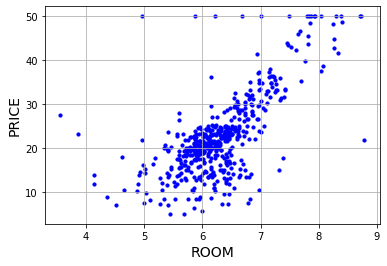

In [5]:
plt.scatter(x[:,1], y_label, s=10, c='b')
plt.xlabel('ROOM', fontsize=14)
plt.ylabel('PRICE', fontsize=14)
plt.grid(True)
plt.show()

In [6]:
# parameter setting 
iters = 50000
lr = 0.01

In [7]:
def pred(x, w):
    return(np.dot(x, w))

def train (x, y_label, iters, lr):
    # intialization 
    M = x.shape[0] # num of samples
    D = x.shape[1]  # dim of samples
    w = np.ones(D)  # initialize weights
    loss_mem = np.zeros((0,2)) # store loss
    
    for k in range(iters):
        y_pred = pred(x, w)
        error = y_pred - y_label
        # update weight
        w = w - lr * (np.dot(x.T, error)) / M
    
        if ( k % 100 == 0):
            loss = np.mean(error ** 2) / 2
            loss_mem = np.vstack((loss_mem, np.array([k, loss])))
            print("iter = {}, loss = {}" .format(k, loss))    
    
    return loss_mem, w

In [8]:
loss_01, w_trained =  train (x, y_label, iters, lr)

iter = 0, loss = 154.22493384090907
iter = 100, loss = 29.61751801156841
iter = 200, loss = 29.43176621285963
iter = 300, loss = 29.250428212542577
iter = 400, loss = 29.073399130791746
iter = 500, loss = 28.90057657991573
iter = 600, loss = 28.731860605139747
iter = 700, loss = 28.56715362679504
iter = 800, loss = 28.406360383882138
iter = 900, loss = 28.249387878975032
iter = 1000, loss = 28.096145324434623
iter = 1100, loss = 27.94654408990015
iter = 1200, loss = 27.800497651028387
iter = 1300, loss = 27.657921539450868
iter = 1400, loss = 27.51873329392016
iter = 1500, loss = 27.38285241261713
iter = 1600, loss = 27.250200306591278
iter = 1700, loss = 27.120700254307618
iter = 1800, loss = 26.99427735727346
iter = 1900, loss = 26.870858496719627
iter = 2000, loss = 26.75037229131106
iter = 2100, loss = 26.632749055862163
iter = 2200, loss = 26.517920761033313
iter = 2300, loss = 26.405820993984896
iter = 2400, loss = 26.29638491996638
iter = 2500, loss = 26.18954924481808
iter = 26

iter = 32800, loss = 21.803280566298696
iter = 32900, loss = 21.803209169655457
iter = 33000, loss = 21.80313946952548
iter = 33100, loss = 21.80307142559654
iter = 33200, loss = 21.803004998514304
iter = 33300, loss = 21.802940149859577
iter = 33400, loss = 21.802876842126064
iter = 33500, loss = 21.802815038698707
iter = 33600, loss = 21.802754703832456
iter = 33700, loss = 21.802695802631657
iter = 33800, loss = 21.802638301029823
iter = 33900, loss = 21.80258216576995
iter = 34000, loss = 21.80252736438529
iter = 34100, loss = 21.802473865180556
iter = 34200, loss = 21.8024216372136
iter = 34300, loss = 21.802370650277517
iter = 34400, loss = 21.80232087488317
iter = 34500, loss = 21.802272282242132
iter = 34600, loss = 21.802224844250055
iter = 34700, loss = 21.802178533470393
iter = 34800, loss = 21.802133323118532
iter = 34900, loss = 21.802089187046338
iter = 35000, loss = 21.80204609972696
iter = 35100, loss = 21.802004036240156
iter = 35200, loss = 21.80196297225781
iter = 35

In [9]:
xall = x[:,1].flatten()
xl = np.array([[1, xall.min()], [1, xall.max()]])
yl = pred(xl, w_trained)

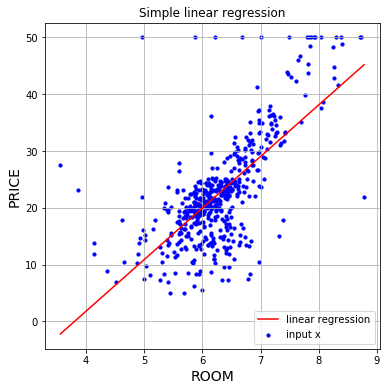

In [10]:
plt.figure(figsize=(6,6))
plt.title("Simple linear regression")
plt.scatter(x[:,1], y_label, s=10, c='b', label='input x')
plt.xlabel('ROOM', fontsize=14)
plt.ylabel('PRICE', fontsize=14)
plt.plot(xl[:,1], yl, c='r', label='linear regression')
plt.grid(True)
plt.legend()
plt.show()

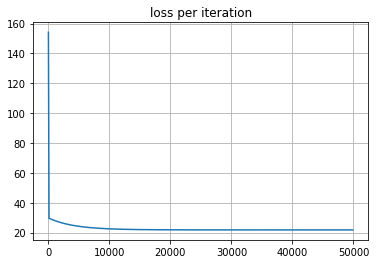

In [11]:
plt.title("loss per iteration")
plt.plot(loss_01[:,0], loss_01[:,1])
plt.grid(True)
plt.show()

### More features：add "LSTAT"

In [12]:
x_add = x_org[:, feature_names == 'LSTAT']
x2 = np.hstack((x, x_add))
print("Shape after adding feature LSTAT：{}".format(x2.shape))

Shape after adding feature LSTAT：(506, 3)


In [13]:
loss_02, w_trained =  train (x2, y_label, iters, lr)

iter = 0, loss = 112.0639816077075
iter = 100, loss = 3.753823486849579e+30
iter = 200, loss = 2.6553340900921252e+60
iter = 300, loss = 1.878297995285461e+90
iter = 400, loss = 1.3286476350593942e+120
iter = 500, loss = 9.398426355028967e+149
iter = 600, loss = 6.648144746590724e+179
iter = 700, loss = 4.7026839283548974e+209
iter = 800, loss = 3.3265274708931158e+239
iter = 900, loss = 2.3530786213134647e+269
iter = 1000, loss = 1.664492190889983e+299
iter = 1100, loss = inf
iter = 1200, loss = inf
iter = 1300, loss = inf
iter = 1400, loss = inf
iter = 1500, loss = inf
iter = 1600, loss = inf
iter = 1700, loss = inf
iter = 1800, loss = inf
iter = 1900, loss = inf
iter = 2000, loss = inf
iter = 2100, loss = nan
iter = 2200, loss = nan
iter = 2300, loss = nan
iter = 2400, loss = nan
iter = 2500, loss = nan
iter = 2600, loss = nan
iter = 2700, loss = nan
iter = 2800, loss = nan
iter = 2900, loss = nan
iter = 3000, loss = nan
iter = 3100, loss = nan
iter = 3200, loss = nan
iter = 3300, l

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: overflow encountered in square
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in subtract
  from ipykernel import kernelapp as app


iter = 14900, loss = nan
iter = 15000, loss = nan
iter = 15100, loss = nan
iter = 15200, loss = nan
iter = 15300, loss = nan
iter = 15400, loss = nan
iter = 15500, loss = nan
iter = 15600, loss = nan
iter = 15700, loss = nan
iter = 15800, loss = nan
iter = 15900, loss = nan
iter = 16000, loss = nan
iter = 16100, loss = nan
iter = 16200, loss = nan
iter = 16300, loss = nan
iter = 16400, loss = nan
iter = 16500, loss = nan
iter = 16600, loss = nan
iter = 16700, loss = nan
iter = 16800, loss = nan
iter = 16900, loss = nan
iter = 17000, loss = nan
iter = 17100, loss = nan
iter = 17200, loss = nan
iter = 17300, loss = nan
iter = 17400, loss = nan
iter = 17500, loss = nan
iter = 17600, loss = nan
iter = 17700, loss = nan
iter = 17800, loss = nan
iter = 17900, loss = nan
iter = 18000, loss = nan
iter = 18100, loss = nan
iter = 18200, loss = nan
iter = 18300, loss = nan
iter = 18400, loss = nan
iter = 18500, loss = nan
iter = 18600, loss = nan
iter = 18700, loss = nan
iter = 18800, loss = nan


In [14]:
# tuning learning rate
iters = 50000
lr = 0.001

In [15]:
loss_02, w_trained =  train(x2, y_label, iters, lr)

iter = 0, loss = 112.0639816077075
iter = 100, loss = 25.358934200838426
iter = 200, loss = 16.391054850586045
iter = 300, loss = 15.403015477091875
iter = 400, loss = 15.294135006632079
iter = 500, loss = 15.282113695594543
iter = 600, loss = 15.280763630069565
iter = 700, loss = 15.280589272586079
iter = 800, loss = 15.280544476062445
iter = 900, loss = 15.280513983829717
iter = 1000, loss = 15.280485097737486
iter = 1100, loss = 15.280456418763167
iter = 1200, loss = 15.280427792737308
iter = 1300, loss = 15.280399202639066
iter = 1400, loss = 15.280370646557646
iter = 1500, loss = 15.280342124247017
iter = 1600, loss = 15.280313635644589
iter = 1700, loss = 15.280285180708036
iter = 1800, loss = 15.28025675939729
iter = 1900, loss = 15.28022837167259
iter = 2000, loss = 15.280200017494247
iter = 2100, loss = 15.280171696822613
iter = 2200, loss = 15.28014340961809
iter = 2300, loss = 15.280115155841134
iter = 2400, loss = 15.280086935452243
iter = 2500, loss = 15.28005874841196
ite

iter = 30400, loss = 15.273364085839233
iter = 30500, loss = 15.273343843327243
iter = 30600, loss = 15.273323624736236
iter = 30700, loss = 15.27330343003795
iter = 30800, loss = 15.27328325920415
iter = 30900, loss = 15.273263112206637
iter = 31000, loss = 15.27324298901724
iter = 31100, loss = 15.27322288960783
iter = 31200, loss = 15.273202813950297
iter = 31300, loss = 15.27318276201658
iter = 31400, loss = 15.273162733778635
iter = 31500, loss = 15.273142729208475
iter = 31600, loss = 15.273122748278123
iter = 31700, loss = 15.273102790959635
iter = 31800, loss = 15.273082857225123
iter = 31900, loss = 15.273062947046713
iter = 32000, loss = 15.27304306039656
iter = 32100, loss = 15.27302319724687
iter = 32200, loss = 15.27300335756987
iter = 32300, loss = 15.272983541337814
iter = 32400, loss = 15.272963748523006
iter = 32500, loss = 15.272943979097773
iter = 32600, loss = 15.27292423303447
iter = 32700, loss = 15.272904510305494
iter = 32800, loss = 15.272884810883268
iter = 32

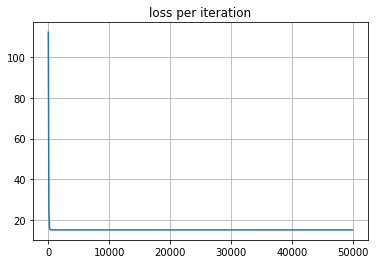

In [16]:
plt.title("loss per iteration")
plt.plot(loss_02[:,0], loss_02[:,1])
plt.grid(True)
plt.show()

### how about more features?

In [17]:
x_add = x_org[:, feature_names == 'CRIM']
x3 = np.hstack((x2, x_add))
print("Shape after adding feature CRIM：{}".format(x3.shape))

Shape after adding feature CRIM：(506, 4)


In [18]:
loss_03, w_trained =  train(x3, y_label, iters, lr)

iter = 0, loss = 203.40169078348896
iter = 100, loss = 24.82640903162969
iter = 200, loss = 16.26807126446315
iter = 300, loss = 15.161430902922433
iter = 400, loss = 15.018283688800592
iter = 500, loss = 14.999724318078
iter = 600, loss = 14.997275263211586
iter = 700, loss = 14.99690946530499
iter = 800, loss = 14.996813107321223
iter = 900, loss = 14.996751647359348
iter = 1000, loss = 14.996694757107656
iter = 1100, loss = 14.996638514793213
iter = 1200, loss = 14.99658241323125
iter = 1300, loss = 14.99652638677211
iter = 1400, loss = 14.996470426860439
iter = 1500, loss = 14.996414532323712
iter = 1600, loss = 14.996358702944164
iter = 1700, loss = 14.996302938627553
iter = 1800, loss = 14.996247239295695
iter = 1900, loss = 14.996191604872548
iter = 2000, loss = 14.996136035282438
iter = 2100, loss = 14.9960805304498
iter = 2200, loss = 14.99602509029918
iter = 2300, loss = 14.995969714755187
iter = 2400, loss = 14.995914403742546
iter = 2500, loss = 14.995859157186047
iter = 26

iter = 26300, loss = 14.984383949833195
iter = 26400, loss = 14.984342140177844
iter = 26500, loss = 14.984300379244967
iter = 26600, loss = 14.98425866697778
iter = 26700, loss = 14.984217003319575
iter = 26800, loss = 14.984175388213705
iter = 26900, loss = 14.98413382160359
iter = 27000, loss = 14.984092303432714
iter = 27100, loss = 14.98405083364463
iter = 27200, loss = 14.984009412182958
iter = 27300, loss = 14.983968038991378
iter = 27400, loss = 14.983926714013645
iter = 27500, loss = 14.98388543719356
iter = 27600, loss = 14.983844208475016
iter = 27700, loss = 14.983803027801956
iter = 27800, loss = 14.983761895118384
iter = 27900, loss = 14.983720810368386
iter = 28000, loss = 14.983679773496092
iter = 28100, loss = 14.983638784445718
iter = 28200, loss = 14.983597843161531
iter = 28300, loss = 14.983556949587866
iter = 28400, loss = 14.983516103669126
iter = 28500, loss = 14.983475305349776
iter = 28600, loss = 14.983434554574343
iter = 28700, loss = 14.983393851287431
iter

In [19]:
x_add = x_org[:, feature_names == 'TAX']
x4 = np.hstack((x3, x_add))
print("Shape after adding feature TAX：{}".format(x4.shape))

Shape after adding feature TAX：(506, 5)


In [20]:
x4.shape

(506, 5)

In [21]:
loss_04, w_trained =  train(x4, y_label, iters, lr)

iter = 0, loss = 100309.13316491393
iter = 100, loss = inf
iter = 200, loss = nan
iter = 300, loss = nan
iter = 400, loss = nan
iter = 500, loss = nan
iter = 600, loss = nan
iter = 700, loss = nan
iter = 800, loss = nan
iter = 900, loss = nan
iter = 1000, loss = nan
iter = 1100, loss = nan
iter = 1200, loss = nan
iter = 1300, loss = nan
iter = 1400, loss = nan
iter = 1500, loss = nan
iter = 1600, loss = nan
iter = 1700, loss = nan
iter = 1800, loss = nan
iter = 1900, loss = nan
iter = 2000, loss = nan
iter = 2100, loss = nan
iter = 2200, loss = nan
iter = 2300, loss = nan
iter = 2400, loss = nan
iter = 2500, loss = nan
iter = 2600, loss = nan
iter = 2700, loss = nan
iter = 2800, loss = nan
iter = 2900, loss = nan
iter = 3000, loss = nan
iter = 3100, loss = nan
iter = 3200, loss = nan
iter = 3300, loss = nan
iter = 3400, loss = nan
iter = 3500, loss = nan
iter = 3600, loss = nan
iter = 3700, loss = nan
iter = 3800, loss = nan
iter = 3900, loss = nan
iter = 4000, loss = nan
iter = 4100, 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: overflow encountered in square
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in subtract
  from ipykernel import kernelapp as app


iter = 12700, loss = nan
iter = 12800, loss = nan
iter = 12900, loss = nan
iter = 13000, loss = nan
iter = 13100, loss = nan
iter = 13200, loss = nan
iter = 13300, loss = nan
iter = 13400, loss = nan
iter = 13500, loss = nan
iter = 13600, loss = nan
iter = 13700, loss = nan
iter = 13800, loss = nan
iter = 13900, loss = nan
iter = 14000, loss = nan
iter = 14100, loss = nan
iter = 14200, loss = nan
iter = 14300, loss = nan
iter = 14400, loss = nan
iter = 14500, loss = nan
iter = 14600, loss = nan
iter = 14700, loss = nan
iter = 14800, loss = nan
iter = 14900, loss = nan
iter = 15000, loss = nan
iter = 15100, loss = nan
iter = 15200, loss = nan
iter = 15300, loss = nan
iter = 15400, loss = nan
iter = 15500, loss = nan
iter = 15600, loss = nan
iter = 15700, loss = nan
iter = 15800, loss = nan
iter = 15900, loss = nan
iter = 16000, loss = nan
iter = 16100, loss = nan
iter = 16200, loss = nan
iter = 16300, loss = nan
iter = 16400, loss = nan
iter = 16500, loss = nan
iter = 16600, loss = nan


In [22]:
# tuning learning rate
iters = 50000
lr = 0.00001

In [23]:
loss_04, w_trained =  train(x4, y_label, iters, lr)

iter = 0, loss = 100309.13316491393
iter = 100, loss = 174.85769673115675
iter = 200, loss = 156.13333749083634
iter = 300, loss = 144.624831556599
iter = 400, loss = 134.34961416712818
iter = 500, loss = 125.16883566110963
iter = 600, loss = 116.95975526893321
iter = 700, loss = 109.61359461173659
iter = 800, loss = 103.0339382138804
iter = 900, loss = 97.13531803117142
iter = 1000, loss = 91.841960754483
iter = 1100, loss = 87.08667911944221
iter = 1200, loss = 82.80989062071174
iter = 1300, loss = 78.95874894660638
iter = 1400, loss = 75.48637514535245
iter = 1500, loss = 72.35117703386058
iter = 1600, loss = 69.51624668611215
iter = 1700, loss = 66.94882701121105
iter = 1800, loss = 64.6198394685457
iter = 1900, loss = 62.50346588503098
iter = 2000, loss = 60.576778150907806
iter = 2100, loss = 58.819410288338915
iter = 2200, loss = 57.213268021886215
iter = 2300, loss = 55.74227154147939
iter = 2400, loss = 54.39212764516306
iter = 2500, loss = 53.15012788823697
iter = 2600, loss 

iter = 27100, loss = 16.573098367359663
iter = 27200, loss = 16.552559082895723
iter = 27300, loss = 16.532254100686085
iter = 27400, loss = 16.51218074787567
iter = 27500, loss = 16.49233638210134
iter = 27600, loss = 16.472718391144074
iter = 27700, loss = 16.453324192584926
iter = 27800, loss = 16.434151233465087
iter = 27900, loss = 16.415196989949752
iter = 28000, loss = 16.39645896699587
iter = 28100, loss = 16.37793469802356
iter = 28200, loss = 16.359621744591404
iter = 28300, loss = 16.34151769607548
iter = 28400, loss = 16.32362016935194
iter = 28500, loss = 16.30592680848322
iter = 28600, loss = 16.28843528440796
iter = 28700, loss = 16.271143294634335
iter = 28800, loss = 16.25404856293695
iter = 28900, loss = 16.23714883905711
iter = 29000, loss = 16.22044189840672
iter = 29100, loss = 16.203925541775224
iter = 29200, loss = 16.187597595040288
iter = 29300, loss = 16.17145590888145
iter = 29400, loss = 16.15549835849719
iter = 29500, loss = 16.13972284332528
iter = 29600, 

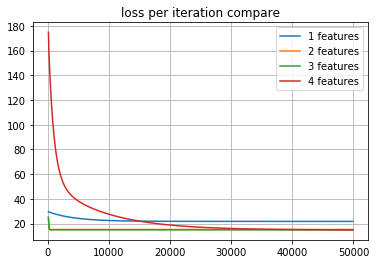

In [24]:
plt.title("loss per iteration compare")
plt.plot(loss_01[1:,0], loss_01[1:,1], label='1 features')
plt.plot(loss_02[1:,0], loss_02[1:,1], label='2 features')
plt.plot(loss_03[1:,0], loss_03[1:,1], label='3 features')
plt.plot(loss_04[1:,0], loss_04[1:,1], label='4 features')
plt.grid(True)
plt.legend()
plt.show()